# Relación Birads con Síntomas

In [1]:
import pycaret
import pandas as pd
import ast 
from pycaret.classification import *
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
mlb = MultiLabelBinarizer()




In [3]:
def transformacion(df):

    #Transformar la columna 'findign_categories' en listas 
    df['finding_categories'] = df['finding_categories'].apply(lambda x: ast.literal_eval(x))

    #Todas las columnas vacías de 'finding_birads' se llenan con el valor de 'breast_birads'
    df['finding_birads'] = df['finding_birads'].fillna(df['breast_birads'])

    #Contar la cantidad de columnas vacías en 'finding_birads'
    empty_count = df['finding_birads'].isna().sum()

    print(f"Cantidad de valores vacíos en 'finding_birads': {empty_count}")

    df_transformed = separacion_dataset(df)
    
    return(df_transformed)


def separacion_dataset (df):
    # Separa en columnas con todas las categorías que existen, poniendo un 1 si es que esta.
    mlb = MultiLabelBinarizer()
    finding_categories_encoded = pd.DataFrame(mlb.fit_transform(df['finding_categories']),
                                            columns=mlb.classes_,
                                            index=df.index)
    
    df_transformed = pd.concat([df, finding_categories_encoded], axis=1).drop(columns=['finding_categories'])

    return df_transformed

def separacion(df):
    df_train = df[df['split'] == 'training'].drop(columns=['split'])
    df_test = df[df['split'] == 'test'].drop(columns=['split'])
    return df_train, df_test



In [4]:
def trans (df):
        #Transformar la columna 'findign_categories' en listas 
    df['finding_categories'] = df['finding_categories'].apply(lambda x: ast.literal_eval(x))

    #Todas las columnas vacías de 'finding_birads' se llenan con el valor de 'breast_birads'
    df['finding_birads'] = df['finding_birads'].fillna(df['breast_birads'])

    #Contar la cantidad de columnas vacías en 'finding_birads'
    empty_count = df['finding_birads'].isna().sum()

    print(f"Cantidad de valores vacíos en 'finding_birads': {empty_count}")

    
    mlb = MultiLabelBinarizer()
    finding_categories_encoded = pd.DataFrame(mlb.fit_transform(df['finding_categories']),
                                            columns=mlb.classes_,
                                            index=df.index)
    
    df_transformed = pd.concat([df, finding_categories_encoded], axis=1).drop(columns=['finding_categories'])

    return df_transformed

def matriz_confusion(y_true, y_pred):
    # Calcular la matriz de confusión
    matriz_confusion = confusion_matrix(y_true, y_pred)
    
    # Crear el gráfico de la matriz de confusión con seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
    
    # Agregar títulos y etiquetas
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Reales')
    
    # Mostrar el gráfico
    plt.show()


In [5]:
def mostrar_filas_por_image_id(df, image_id):
    # Filtrar el DataFrame para mostrar las filas que coincidan con el image_id
    filas_filtradas = df[df['image_id'] == image_id]
    
    # Verificar si se encontraron filas
    if filas_filtradas.empty:
        print(f"No se encontraron filas con image_id: {image_id}")
    else:
        print(filas_filtradas)


def contar_filas_elemento(df, columna, elemento):
    # Contar las filas que contienen el elemento
    contiene_elemento = df[columna].apply(lambda x: elemento in x if isinstance(x, list) else False).sum()
    
    # Contar las filas que solo contienen ese elemento
    solo_elemento = df[columna].apply(lambda x: x == [elemento] if isinstance(x, list) else False).sum()
    
    # Imprimir los resultados inmediatamente
    print(f"Cantidad de filas que contienen '{elemento}': {contiene_elemento}")
    print(f"Cantidad de filas que solo tienen '{elemento}': {solo_elemento}")


## Parte 1: Probar con el Mini Dataset

In [66]:
archivo_mini = 'findings_comprimido.csv'
df = pd.read_csv(archivo_mini, delimiter=';')
df = transformacion(df)
df.head()

Cantidad de valores vacíos en 'finding_birads': 0


,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_birads,...,xmax,ymax,split,Architectural Distortion,Asymmetry,Focal Asymmetry,Mass,No Finding,Suspicious Calcification,Suspicious Lymph Node
0,917a4de3b1f921f1c9fa98b7a61d749d,22bada39b619f79a660b3a06eb6ff5a9,4dd8faf113a9421e03a6e2bcd4238da2,L,CC,3518,2800,BI-RADS 3,DENSITY C,BI-RADS 3,...,44.935.699.462.891,22.250.200.195.312,test,0,0,0,1,0,0,0
1,917a4de3b1f921f1c9fa98b7a61d749d,22bada39b619f79a660b3a06eb6ff5a9,19056b152c5d2ed98f66de006fa45a6c,L,MLO,3518,2800,BI-RADS 3,DENSITY C,BI-RADS 3,...,43.254.400.634.766,16.197.399.902.344,test,0,0,0,1,0,0,0
2,e233b75f7dc52e0ea37c88ad1c4df17d,1a1f62519a7fb1fd022e0bdae77786b7,8c799782afb5ab3a1a9cd5236dbddb98,L,CC,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,...,27.180.999.755.859,14.768.100.585.938,training,0,0,1,0,0,1,0
3,e233b75f7dc52e0ea37c88ad1c4df17d,1a1f62519a7fb1fd022e0bdae77786b7,a869427ece4cb34d43825be65705929b,L,MLO,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,...,78.398.901.367.188,11.948.599.853.516,training,0,0,1,0,0,1,0
4,2c4cc5495e3fa8f1b4eeab6798714449,edb09720b352d194a0fc1323f3d76337,cafb38b60a61619ad1bfa25b77ccb521,R,CC,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,...,2.583.669.921.875,12.088.900.146.484,training,0,0,1,0,0,0,0


In [67]:
df_train, df_test = separacion(df)

In [171]:
columna_inicio = df_train.columns.get_loc('Architectural Distortion')

df_seleccionado = df_train.iloc[:, columna_inicio:]

In [173]:
clf1 = setup(data=df_seleccionado, target=df_train['finding_birads'], session_id=123)

best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,finding_birads
2,Target type,Multiclass
3,Target mapping,"BI-RADS 1: 0, BI-RADS 2: 1, BI-RADS 3: 2, BI-RADS 4: 3, BI-RADS 5: 4"
4,Original data shape,"(16391, 12)"
5,Transformed data shape,"(16391, 12)"
6,Transformed train set shape,"(11473, 12)"
7,Transformed test set shape,"(4918, 12)"
8,Numeric features,11
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.7173,0.6708,0.7173,0.5526,0.6175,0.3145,0.4027,0.0170
rf,Random Forest Classifier,0.7172,0.6718,0.7172,0.5522,0.6173,0.3141,0.4022,0.1360
et,Extra Trees Classifier,0.7172,0.6709,0.7172,0.5524,0.6174,0.3143,0.4024,0.1040
gbc,Gradient Boosting Classifier,0.7171,0.0000,0.7171,0.5523,0.6173,0.3139,0.4017,0.4760
lightgbm,Light Gradient Boosting Machine,0.7168,0.6719,0.7168,0.5521,0.6168,0.3133,0.4012,0.1660
lda,Linear Discriminant Analysis,0.7166,0.0000,0.7166,0.5519,0.6165,0.3129,0.4006,0.0220
ridge,Ridge Classifier,0.7159,0.0000,0.7159,0.5480,0.6150,0.3109,0.3981,0.0200
lr,Logistic Regression,0.7154,0.0000,0.7154,0.5470,0.6144,0.3097,0.3966,0.8260
knn,K Neighbors Classifier,0.7125,0.6676,0.7125,0.5440,0.6127,0.3023,0.3864,0.3860
svm,SVM - Linear Kernel,0.7119,0.0000,0.7119,0.5467,0.6104,0.3015,0.3865,0.0360


In [175]:
columna_inicio = df_test.columns.get_loc('Architectural Distortion')

df_test = df_test.iloc[:, columna_inicio:]

In [176]:
print(best_model)

final_model = finalize_model(best_model)

mini_predictions = predict_model(final_model, data=df_test)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7201,0.6730,0.7201,0.5519,0.6192,0.3205,0.4095


## Parte 2: Probar con todo el dataset original

### Parte A : Probar con todos los BI-RADS 


In [98]:
archivo = 'finding_annotations.csv'
df = pd.read_csv(archivo)
df.head()

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2355.139893,1731.640015,2482.979980,1852.750000,training
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2386.679932,1240.609985,2501.800049,1354.040039,training
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,2279.179932,1166.510010,2704.439941,2184.260010,training
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,1954.270020,1443.640015,2589.760010,2193.810059,training
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Architectural Distortion'],BI-RADS 4,2172.300049,1967.410034,2388.699951,2147.159912,training


In [99]:
df = trans(df)
df_train, df_test = separacion(df)

Cantidad de valores vacíos en 'finding_birads': 0


In [100]:
columna_inicio = df_train.columns.get_loc('Architectural Distortion')

df_seleccionado = df_train.iloc[:, columna_inicio:]
print(df_seleccionado.head())

   Architectural Distortion  Asymmetry  Focal Asymmetry  Global Asymmetry  \
0                         0          0                0                 0   
1                         0          0                0                 0   
2                         0          0                0                 1   
3                         0          0                0                 1   
4                         1          0                0                 0   

   Mass  Nipple Retraction  No Finding  Skin Retraction  Skin Thickening  \
0     1                  0           0                0                0   
1     1                  0           0                0                0   
2     0                  0           0                0                0   
3     0                  0           0                0                0   
4     0                  0           0                0                0   

   Suspicious Calcification  Suspicious Lymph Node  
0                         0

In [101]:
clf1 = setup(data=df_seleccionado, target= df_train['finding_birads'], session_id=123)

# Comparar modelos
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,finding_birads
2,Target type,Multiclass
3,Target mapping,"BI-RADS 1: 0, BI-RADS 2: 1, BI-RADS 3: 2, BI-RADS 4: 3, BI-RADS 5: 4"
4,Original data shape,"(16391, 12)"
5,Transformed data shape,"(16391, 12)"
6,Transformed train set shape,"(11473, 12)"
7,Transformed test set shape,"(4918, 12)"
8,Numeric features,11
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.7173,0.6708,0.7173,0.5526,0.6175,0.3145,0.4027,0.0190
rf,Random Forest Classifier,0.7172,0.6718,0.7172,0.5522,0.6173,0.3141,0.4022,0.1640
et,Extra Trees Classifier,0.7172,0.6709,0.7172,0.5524,0.6174,0.3143,0.4024,0.1270
gbc,Gradient Boosting Classifier,0.7171,0.0000,0.7171,0.5523,0.6173,0.3139,0.4017,0.5700
lightgbm,Light Gradient Boosting Machine,0.7168,0.6719,0.7168,0.5521,0.6168,0.3133,0.4012,0.3030
lda,Linear Discriminant Analysis,0.7166,0.0000,0.7166,0.5519,0.6165,0.3129,0.4006,0.0270
ridge,Ridge Classifier,0.7159,0.0000,0.7159,0.5480,0.6150,0.3109,0.3981,0.0210
lr,Logistic Regression,0.7154,0.0000,0.7154,0.5470,0.6144,0.3097,0.3966,0.8840
knn,K Neighbors Classifier,0.7125,0.6676,0.7125,0.5440,0.6127,0.3023,0.3864,0.4050
svm,SVM - Linear Kernel,0.7119,0.0000,0.7119,0.5467,0.6104,0.3015,0.3865,0.0380


In [102]:
columna_inicio = df_test.columns.get_loc('Architectural Distortion')

df_probar = df_test.iloc[:, columna_inicio:]

In [103]:
final_model = finalize_model(best_model)
predictions = predict_model(final_model, data=df_probar)

#predictions.head()

y_pred = predictions['prediction_label']
y_true = df_test['finding_birads']

accuracy = accuracy_score(y_true, y_pred)

print(f"Precisión del modelo: {accuracy:.4f}")

Precisión del modelo: 0.7201


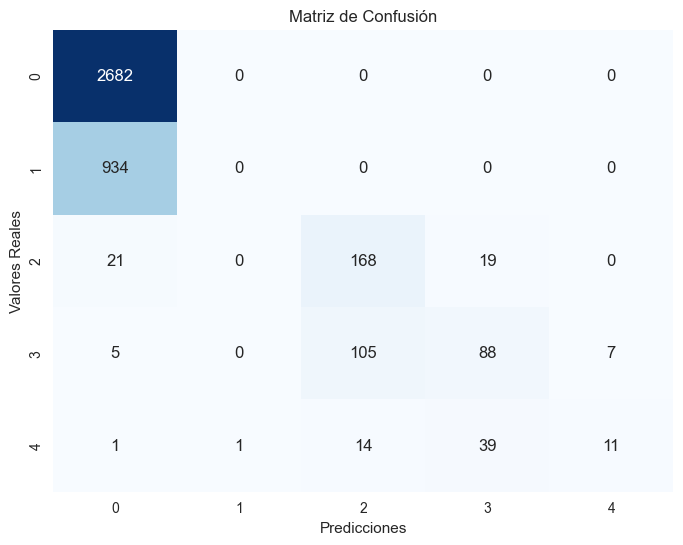

In [109]:
matriz_confusion(y_true, y_pred)

### Parte B: Probar solo con la predicción de BI-RADS 3, 4 y 5

In [2]:
normal_findings = ['Nipple Retraction',
 'Skin Retraction',
 'Skin Thickening']

anormal_findings = ['Architectural Distortion',
 'Asymmetry',
 'Focal Asymmetry',
 'Global Asymmetry',
 'Mass',
 'Suspicious Calcification']

suspicious_findings = ['Suspicious Lymph Node']

focus_findings = anormal_findings + suspicious_findings

abnormal_findings = suspicious_findings + normal_findings

focus_birads = ['BI-RADS 3', 'BI-RADS 4', 'BI-RADS 5']


In [252]:
df = pd.read_csv(archivo)
df.head()

df_filtrado = df[df['finding_birads'].isin(['BI-RADS 3', 'BI-RADS 4', 'BI-RADS 5'])]
df_filtrado['finding_categories'] = df_filtrado['finding_categories'].apply(lambda x: ast.literal_eval(x))

In [253]:
df_filtrado['finding_categories'] = df_filtrado['finding_categories'].apply(lambda x: [item for item in x if item not in normal_findings])
df_filtrado


,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,[Mass],BI-RADS 4,2355.139893,1731.640015,2482.979980,1852.750000,training
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,[Mass],BI-RADS 4,2386.679932,1240.609985,2501.800049,1354.040039,training
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,[Global Asymmetry],BI-RADS 3,2279.179932,1166.510010,2704.439941,2184.260010,training
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,[Global Asymmetry],BI-RADS 3,1954.270020,1443.640015,2589.760010,2193.810059,training
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,[Architectural Distortion],BI-RADS 4,2172.300049,1967.410034,2388.699951,2147.159912,training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,b8acac150be7f949f78dc631a3851f8b,f351166fe105bea6f090e38f41bc844c,bdf1539e07e60cfcb5e7833f5b63fa86,R,MLO,3580,2706,BI-RADS 4,DENSITY C,[Mass],BI-RADS 4,1959.930054,1535.310059,2110.709961,1707.640015,test
2250,b8acac150be7f949f78dc631a3851f8b,f351166fe105bea6f090e38f41bc844c,bdf1539e07e60cfcb5e7833f5b63fa86,R,MLO,3580,2706,BI-RADS 4,DENSITY C,[Mass],BI-RADS 4,1734.920044,2052.899902,2061.189941,2421.520020,test
2251,b8acac150be7f949f78dc631a3851f8b,f351166fe105bea6f090e38f41bc844c,bdf1539e07e60cfcb5e7833f5b63fa86,R,MLO,3580,2706,BI-RADS 4,DENSITY C,[Mass],BI-RADS 4,1993.109985,2288.360107,2200.810059,2441.879883,test
2252,0bfd4fcebaba4e9c4086edd05044a75f,255af1dcf2e5342bcc6bae1fc1a918cd,997e15346547ff56b4209ac73e74556f,L,MLO,3580,2639,BI-RADS 4,DENSITY C,"[Suspicious Calcification, Focal Asymmetry]",BI-RADS 4,74.847801,1417.400024,727.844971,2225.929932,training


In [232]:
mlb = MultiLabelBinarizer()
finding_categories_encoded = pd.DataFrame(mlb.fit_transform(df_filtrado['finding_categories']),
                                            columns=mlb.classes_,
                                            index=df_filtrado.index)

In [246]:
df_transformed = pd.concat([df_filtrado, finding_categories_encoded], axis=1).drop(columns=['finding_categories'])


In [259]:
empty_count = df_transformed['finding_birads'].isna().sum()

print(f"Cantidad de valores vacíos en 'finding_birads': {empty_count}")

Cantidad de valores vacíos en 'finding_birads': 0


In [258]:
df_transformed  

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_birads,...,ymin,xmax,ymax,split,Architectural Distortion,Asymmetry,Focal Asymmetry,Global Asymmetry,Mass,Suspicious Calcification
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,...,1731.640015,2482.979980,1852.750000,training,0,0,0,0,1,0
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,...,1240.609985,2501.800049,1354.040039,training,0,0,0,0,1,0
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,BI-RADS 3,...,1166.510010,2704.439941,2184.260010,training,0,0,0,1,0,0
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,BI-RADS 3,...,1443.640015,2589.760010,2193.810059,training,0,0,0,1,0,0
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,...,1967.410034,2388.699951,2147.159912,training,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,b8acac150be7f949f78dc631a3851f8b,f351166fe105bea6f090e38f41bc844c,bdf1539e07e60cfcb5e7833f5b63fa86,R,MLO,3580,2706,BI-RADS 4,DENSITY C,BI-RADS 4,...,1535.310059,2110.709961,1707.640015,test,0,0,0,0,1,0
2250,b8acac150be7f949f78dc631a3851f8b,f351166fe105bea6f090e38f41bc844c,bdf1539e07e60cfcb5e7833f5b63fa86,R,MLO,3580,2706,BI-RADS 4,DENSITY C,BI-RADS 4,...,2052.899902,2061.189941,2421.520020,test,0,0,0,0,1,0
2251,b8acac150be7f949f78dc631a3851f8b,f351166fe105bea6f090e38f41bc844c,bdf1539e07e60cfcb5e7833f5b63fa86,R,MLO,3580,2706,BI-RADS 4,DENSITY C,BI-RADS 4,...,2288.360107,2200.810059,2441.879883,test,0,0,0,0,1,0
2252,0bfd4fcebaba4e9c4086edd05044a75f,255af1dcf2e5342bcc6bae1fc1a918cd,997e15346547ff56b4209ac73e74556f,L,MLO,3580,2639,BI-RADS 4,DENSITY C,BI-RADS 4,...,1417.400024,727.844971,2225.929932,training,0,0,1,0,0,1


In [260]:
df_train = df_transformed[df_transformed['split'] == 'training'].drop(columns=['split'])
df_test = df_transformed[df_transformed['split'] == 'test'].drop(columns=['split'])


In [262]:
empty_count = df_test['finding_birads'].isna().sum()

print(f"Cantidad de valores vacíos en 'finding_birads': {empty_count}")

Cantidad de valores vacíos en 'finding_birads': 0


In [45]:
df_train = df_transformed[df_transformed['split'] == 'training'].drop(columns=['split'])
df_test = df_transformed[df_transformed['split'] == 'test'].drop(columns=['split'])

columna_inicio = df_train.columns.get_loc('Architectural Distortion')

df_seleccionado = df_train.iloc[:, columna_inicio:]

df_train.head()


,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_birads,xmin,ymin,xmax,ymax,Architectural Distortion,Asymmetry,Focal Asymmetry,Global Asymmetry,Mass,Suspicious Calcification
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,2355.139893,1731.640015,2482.979980,1852.750000,0,0,0,0,1,0
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,2386.679932,1240.609985,2501.800049,1354.040039,0,0,0,0,1,0
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,BI-RADS 3,2279.179932,1166.510010,2704.439941,2184.260010,0,0,0,1,0,0
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,BI-RADS 3,1954.270020,1443.640015,2589.760010,2193.810059,0,0,0,1,0,0
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,2172.300049,1967.410034,2388.699951,2147.159912,1,0,0,0,0,0


In [263]:
columna_inicio = df_train.columns.get_loc('Architectural Distortion')

df_seleccionado = df_train.iloc[:, columna_inicio:]

df_train.head()

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_birads,xmin,ymin,xmax,ymax,Architectural Distortion,Asymmetry,Focal Asymmetry,Global Asymmetry,Mass,Suspicious Calcification
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,2355.139893,1731.640015,2482.979980,1852.750000,0,0,0,0,1,0
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,2386.679932,1240.609985,2501.800049,1354.040039,0,0,0,0,1,0
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,BI-RADS 3,2279.179932,1166.510010,2704.439941,2184.260010,0,0,0,1,0,0
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,BI-RADS 3,1954.270020,1443.640015,2589.760010,2193.810059,0,0,0,1,0,0
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,2172.300049,1967.410034,2388.699951,2147.159912,1,0,0,0,0,0


In [ ]:
df_train = df[df['split'] == 'training'].drop(columns=['split'])
df_test = df[df['split'] == 'test'].drop(columns=['split'])

In [266]:
empty_count = df_train['finding_birads'].isna().sum()

print(f"Cantidad de valores vacíos en 'finding_birads': {empty_count}")


Cantidad de valores vacíos en 'finding_birads': 0


In [267]:
clf1 = setup(data=df_seleccionado, target=df_train['finding_birads'], session_id=123)

best_model = compare_models()


,Description,Value
0,Session id,123
1,Target,finding_birads
2,Target type,Multiclass
3,Target mapping,"BI-RADS 3: 0, BI-RADS 4: 1, BI-RADS 5: 2"
4,Original data shape,"(1700, 7)"
5,Transformed data shape,"(1700, 7)"
6,Transformed train set shape,"(1190, 7)"
7,Transformed test set shape,"(510, 7)"
8,Numeric features,6
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.5756,0.0000,0.5756,0.6288,0.5451,0.2752,0.3168,0.0250
lr,Logistic Regression,0.5748,0.0000,0.5748,0.6231,0.5433,0.2689,0.3070,0.8540
gbc,Gradient Boosting Classifier,0.5739,0.0000,0.5739,0.6210,0.5429,0.2704,0.3087,0.0600
lightgbm,Light Gradient Boosting Machine,0.5739,0.6769,0.5739,0.6210,0.5429,0.2704,0.3087,0.0900
dt,Decision Tree Classifier,0.5731,0.6759,0.5731,0.6199,0.5416,0.2686,0.3067,0.0150
ridge,Ridge Classifier,0.5723,0.0000,0.5723,0.6203,0.5406,0.2667,0.3047,0.0080
rf,Random Forest Classifier,0.5723,0.6749,0.5723,0.6192,0.5405,0.2672,0.3054,0.0460
et,Extra Trees Classifier,0.5723,0.6754,0.5723,0.6192,0.5405,0.2672,0.3054,0.0420
lda,Linear Discriminant Analysis,0.5706,0.0000,0.5706,0.6130,0.5395,0.2718,0.3113,0.0090
knn,K Neighbors Classifier,0.5597,0.6190,0.5597,0.5807,0.5435,0.2380,0.2512,0.3300


In [268]:
columna_inicio = df_test.columns.get_loc('Architectural Distortion')

df_test = df_test.iloc[:, columna_inicio:]

In [269]:
final_model = finalize_model(best_model)

# Evaluar el modelo con el conjunto de prueba
predictions = predict_model(final_model, data=df_test)


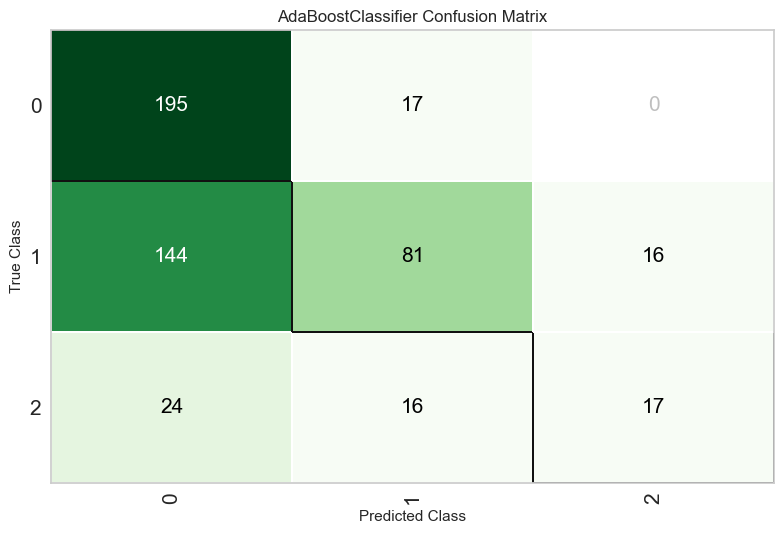

In [270]:
plot_model(best_model, plot='confusion_matrix')

### Parte C: Probar solo con las caract anormales y la sospechosa aparte


In [20]:
contar_filas_elemento(df_filtrado, 'finding_categories', 'Suspicious Lymph Node')

Cantidad de filas que contienen 'Suspicious Lymph Node': 0
Cantidad de filas que solo tienen 'Suspicious Lymph Node': 0


#### i. Caracteristicas Anormales

In [17]:
archivo = 'finding_annotations.csv'
df = pd.read_csv(archivo, delimiter= ';')
df.head()

df['finding_categories'] = df['finding_categories'].apply(lambda x: ast.literal_eval(x))

#df_filtrado = df[df['finding_birads'].isin(['BI-RADS 3', 'BI-RADS 4', 'BI-RADS 5'])]
#df_filtrado['finding_categories'] = df_filtrado['finding_categories'].apply(lambda x: ast.literal_eval(x))

#df_filtrado['finding_categories'] = df_filtrado['finding_categories'].apply(lambda x: [item for item in x if item not in abnormal_findings])

In [ ]:
df['finding_categories'] = df['finding_categories'].apply(lambda x: ast.literal_eval(x))
df_filtrado = df[df['finding_birads'].isin([focus_birads])]
df_filtrado['finding_categories'] = df_filtrado['finding_categories'].apply(lambda x: [item for item in x if item not in abnormal_findings])

In [18]:
df_filtrado.head()

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,[Mass],BI-RADS 4,2355.139893,1731.640015,2482.979980,1852.750000,training
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,[Mass],BI-RADS 4,2386.679932,1240.609985,2501.800049,1354.040039,training
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,[Global Asymmetry],BI-RADS 3,2279.179932,1166.510010,2704.439941,2184.260010,training
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,[Global Asymmetry],BI-RADS 3,1954.270020,1443.640015,2589.760010,2193.810059,training
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,[Architectural Distortion],BI-RADS 4,2172.300049,1967.410034,2388.699951,2147.159912,training


In [21]:
empty_count = df_filtrado['finding_categories'].isna().sum()
print(empty_count)

0


In [ ]:
df_filtrado = df[df['finding_birads'].isin(['BI-RADS 3', 'BI-RADS 4', 'BI-RADS 5'])]
#df_filtrado['finding_categories'] = df_filtrado['finding_categories'].apply(lambda x: ast.literal_eval(x))

df_filtrado['finding_categories'] = df_filtrado['finding_categories'].apply(lambda x: [item for item in x if item not in abnormal_findings])
finding_categories_encoded = pd.DataFrame(mlb.fit_transform(df_filtrado['finding_categories']),
                                            columns=mlb.classes_,
                                            index=df_filtrado.index)

df_transformed = pd.concat([df_filtrado, finding_categories_encoded], axis=1).drop(columns=['finding_categories'])

df_train = df_transformed[df_transformed['split'] == 'training'].drop(columns=['split'])
df_test = df_transformed[df_transformed['split'] == 'test'].drop(columns=['split'])



In [ ]:
df_filtrado['finding_categories'] = df_filtrado['finding_categories'].apply(lambda x: [item for item in x if item not in abnormal_findings])
finding_categories_encoded = pd.DataFrame(mlb.fit_transform(df_filtrado['finding_categories']),
                                            columns=mlb.classes_,
                                            index=df_filtrado.index)

df_transformed = pd.concat([df_filtrado, finding_categories_encoded], axis=1).drop(columns=['finding_categories'])

df_train = df_transformed[df_transformed['split'] == 'training'].drop(columns=['split'])
df_test = df_transformed[df_transformed['split'] == 'test'].drop(columns=['split'])



In [36]:
df_filtrado = df[df['finding_birads'].isin(['BI-RADS 3', 'BI-RADS 4', 'BI-RADS 5'])]
#df_filtrado['finding_categories'] = df_filtrado['finding_categories'].apply(lambda x: ast.literal_eval(x))

df_filtrado['finding_categories'] = df_filtrado['finding_categories'].apply(lambda x: [item for item in x if item not in abnormal_findings])

finding_categories_encoded = pd.DataFrame(mlb.fit_transform(df_filtrado['finding_categories']),
                                            columns=mlb.classes_,
                                            index=df_filtrado.index)

df_transformed = pd.concat([df_filtrado, finding_categories_encoded], axis=1).drop(columns=['finding_categories'])

df_train = df_transformed[df_transformed['split'] == 'training'].drop(columns=['split'])
df_test = df_transformed[df_transformed['split'] == 'test'].drop(columns=['split'])



In [34]:
df_train.head()

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_birads,xmin,ymin,xmax,ymax,Architectural Distortion,Asymmetry,Focal Asymmetry,Global Asymmetry,Mass,Suspicious Calcification
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,23.551.398.925.781,17.316.400.146.484,24.829.799.804.688,1852.75,0,0,0,0,1,0
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,23.866.799.316.406,12.406.099.853.516,25.018.000.488.281,13.540.400.390.625,0,0,0,0,1,0
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,BI-RADS 3,22.791.799.316.406,11.665.100.097.656,27.044.399.414.062,21.842.600.097.656,0,0,0,1,0,0
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,BI-RADS 3,19.542.700.195.312,14.436.400.146.484,25.897.600.097.656,21.938.100.585.938,0,0,0,1,0,0
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,21.723.000.488.281,19.674.100.341.797,23.886.999.511.719,21.471.599.121.094,1,0,0,0,0,0


In [13]:
#df_train = df_transformed[df_transformed['split'] == 'training'].drop(columns=['split'])
#df_test = df_transformed[df_transformed['split'] == 'test'].drop(columns=['split'])

columna_inicio = df_train.columns.get_loc('Architectural Distortion')

df_seleccionado = df_train.iloc[:, columna_inicio:]

df_seleccionado.head()


,Architectural Distortion,Asymmetry,Focal Asymmetry,Global Asymmetry,Mass - Benigna,Mass - Maligna,Mass - Sospechosa,Nipple Retraction,Skin Retraction,Skin Thickening,Suspicious Calcification - Benigna,Suspicious Calcification - Maligna,Suspicious Calcification - Sospechosa
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
clf1 = setup(data=df_seleccionado, target=df_train['finding_birads'], session_id=123)

best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,finding_birads
2,Target type,Multiclass
3,Target mapping,"BI-RADS 3: 0, BI-RADS 4: 1, BI-RADS 5: 2"
4,Original data shape,"(1700, 7)"
5,Transformed data shape,"(1700, 7)"
6,Transformed train set shape,"(1190, 7)"
7,Transformed test set shape,"(510, 7)"
8,Numeric features,6
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.5756,0.0000,0.5756,0.6288,0.5451,0.2752,0.3168,0.0570
lr,Logistic Regression,0.5748,0.0000,0.5748,0.6231,0.5433,0.2689,0.3070,0.6420
gbc,Gradient Boosting Classifier,0.5739,0.0000,0.5739,0.6210,0.5429,0.2704,0.3087,0.1310
lightgbm,Light Gradient Boosting Machine,0.5739,0.6769,0.5739,0.6210,0.5429,0.2704,0.3087,0.1030
dt,Decision Tree Classifier,0.5731,0.6759,0.5731,0.6199,0.5416,0.2686,0.3067,0.0150
ridge,Ridge Classifier,0.5723,0.0000,0.5723,0.6203,0.5406,0.2667,0.3047,0.0160
rf,Random Forest Classifier,0.5723,0.6749,0.5723,0.6192,0.5405,0.2672,0.3054,0.0820
et,Extra Trees Classifier,0.5723,0.6754,0.5723,0.6192,0.5405,0.2672,0.3054,0.0740
lda,Linear Discriminant Analysis,0.5706,0.0000,0.5706,0.6130,0.5395,0.2718,0.3113,0.0160
knn,K Neighbors Classifier,0.5597,0.6190,0.5597,0.5807,0.5435,0.2380,0.2512,0.0280


In [27]:
final_model = best_model

In [28]:
columna_inicio = df_test.columns.get_loc('Architectural Distortion')

df_prueba = df_test.iloc[:, columna_inicio:]

best_model = finalize_model(best_model)

# Evaluar el modelo con el conjunto de prueba
predictions = predict_model(final_model, data=df_prueba)


In [29]:
y_pred = predictions['prediction_label']
y_true = df_test['finding_birads']

accuracy = accuracy_score(y_true, y_pred)

print(f"Precisión del modelo: {accuracy:.4f}")

Precisión del modelo: 0.5967


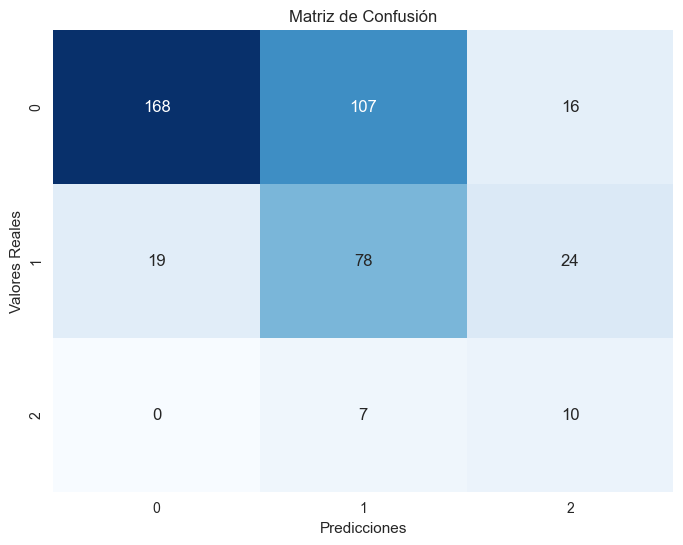

In [30]:
matriz_confusion(y_pred, y_true)

### Parte D: Comparar todos los síntomas con Densidad


In [133]:
columna_inicio = df_train.columns.get_loc('Architectural Distortion')

df_seleccionado = df_train.iloc[:, columna_inicio:]

df_seleccionado = pd.concat([df_seleccionado, df_train['breast_density']], axis=1)

print(df_seleccionado.head())

   Architectural Distortion  Asymmetry  Focal Asymmetry  Global Asymmetry  \
0                         0          0                0                 0   
1                         0          0                0                 0   
2                         0          0                0                 1   
3                         0          0                0                 1   
4                         1          0                0                 0   

   Mass  Suspicious Calcification breast_density  
0     1                         0      DENSITY C  
1     1                         0      DENSITY C  
2     0                         0      DENSITY C  
3     0                         0      DENSITY C  
4     0                         0      DENSITY C  


In [134]:
clf1 = setup(data=df_seleccionado, target=df_train['finding_birads'], session_id=123)

best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,finding_birads
2,Target type,Multiclass
3,Target mapping,"BI-RADS 3: 0, BI-RADS 4: 1, BI-RADS 5: 2"
4,Original data shape,"(1700, 8)"
5,Transformed data shape,"(1700, 11)"
6,Transformed train set shape,"(1190, 11)"
7,Transformed test set shape,"(510, 11)"
8,Numeric features,6
9,Categorical features,1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.5857,0.0000,0.5857,0.6063,0.5628,0.2827,0.3019,0.0180
lr,Logistic Regression,0.5840,0.0000,0.5840,0.6047,0.5602,0.2791,0.2981,0.0320
ada,Ada Boost Classifier,0.5798,0.0000,0.5798,0.6025,0.5571,0.2812,0.3023,0.0410
lda,Linear Discriminant Analysis,0.5798,0.0000,0.5798,0.6135,0.5597,0.3078,0.3338,0.0140
dt,Decision Tree Classifier,0.5739,0.6879,0.5739,0.5947,0.5499,0.2806,0.3035,0.0150
et,Extra Trees Classifier,0.5731,0.6876,0.5731,0.5940,0.5489,0.2793,0.3023,0.0650
gbc,Gradient Boosting Classifier,0.5723,0.0000,0.5723,0.5924,0.5492,0.2780,0.2999,0.0730
rf,Random Forest Classifier,0.5714,0.6857,0.5714,0.5919,0.5479,0.2769,0.2992,0.0580
lightgbm,Light Gradient Boosting Machine,0.5697,0.6897,0.5697,0.5878,0.5469,0.2736,0.2944,0.1180
svm,SVM - Linear Kernel,0.5471,0.0000,0.5471,0.5843,0.5073,0.2021,0.2323,0.0200


In [73]:
columna_inicio = df_test.columns.get_loc('Architectural Distortion')
df_prueba = df_test.iloc[:, columna_inicio:]

df_prueba = pd.concat([df_prueba, df_test['breast_density']], axis=1)


final_model = finalize_model(best_model)

# Evaluar el modelo con el conjunto de prueba
predictions = predict_model(final_model, data=df_prueba)

predictions.head()

,Architectural Distortion,Asymmetry,Focal Asymmetry,Global Asymmetry,Mass - Benigna,Mass - Maligna,Mass - Sospechosa,Nipple Retraction,Skin Retraction,Skin Thickening,Suspicious Calcification - Benigna,Suspicious Calcification - Maligna,Suspicious Calcification - Sospechosa,breast_density,prediction_label,prediction_score
6,0,0,0,0,1,0,0,0,0,0,0,0,0,DENSITY C,BI-RADS 3,0.9985
7,0,0,0,0,1,0,0,0,0,0,0,0,0,DENSITY C,BI-RADS 3,0.9985
18,0,0,0,0,1,0,0,0,0,0,0,0,0,DENSITY C,BI-RADS 3,0.9985
19,0,0,0,0,1,0,0,0,0,0,0,0,0,DENSITY C,BI-RADS 3,0.9985
20,0,0,0,0,0,0,1,0,0,0,0,0,0,DENSITY C,BI-RADS 4,0.9984


In [74]:
y_pred = predictions['prediction_label']
y_true = df_test['finding_birads']

accuracy = accuracy_score(y_true, y_pred)

print(f"Precisión del modelo: {accuracy:.4f}")

Precisión del modelo: 0.9254


In [75]:
print(y_pred, y_true)

6       BI-RADS 3
7       BI-RADS 3
18      BI-RADS 3
19      BI-RADS 3
20      BI-RADS 4
          ...    
2246    BI-RADS 4
2247    BI-RADS 4
2249    BI-RADS 4
2250    BI-RADS 4
2251    BI-RADS 4
Name: prediction_label, Length: 429, dtype: object 6       BI-RADS 3
7       BI-RADS 3
18      BI-RADS 3
19      BI-RADS 3
20      BI-RADS 4
          ...    
2246    BI-RADS 4
2247    BI-RADS 4
2249    BI-RADS 4
2250    BI-RADS 4
2251    BI-RADS 4
Name: finding_birads, Length: 429, dtype: object


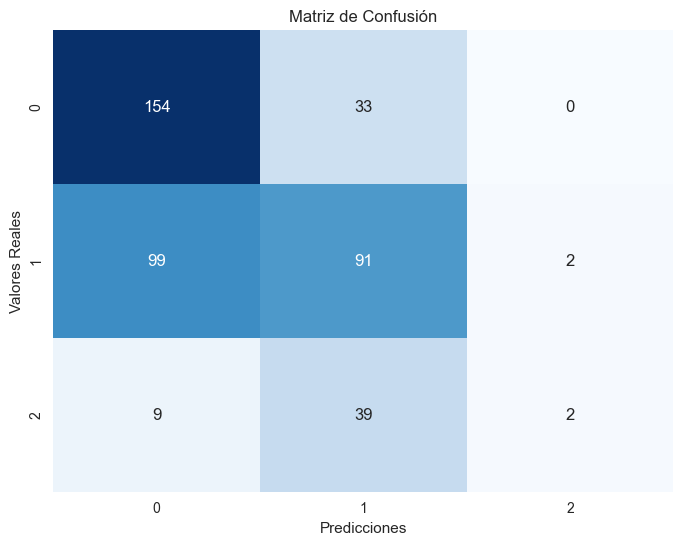

In [139]:
matriz_confusion(y_true, y_pred)

## Parte 3: Probar mejorar el modelo

In [19]:
conteo_birad = df_train['finding_birads'].value_counts()

# Mostrar el resultado
print(conteo_birad)

finding_birads
BI-RADS 4    803
BI-RADS 3    706
BI-RADS 5    191
Name: count, dtype: int64


In [33]:
clf1 = setup(data=df_seleccionado, target=df_train['finding_birads'], session_id=123, fix_imbalance= True)

best_model_1 = compare_models()

,Description,Value
0,Session id,123
1,Target,finding_birads
2,Target type,Multiclass
3,Target mapping,"BI-RADS 3: 0, BI-RADS 4: 1, BI-RADS 5: 2"
4,Original data shape,"(1700, 7)"
5,Transformed data shape,"(2196, 7)"
6,Transformed train set shape,"(1686, 7)"
7,Transformed test set shape,"(510, 7)"
8,Numeric features,6
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.5756,0.0000,0.5756,0.6288,0.5451,0.2752,0.3168,0.0560
lr,Logistic Regression,0.5748,0.0000,0.5748,0.6228,0.5441,0.2739,0.3135,0.0320
dt,Decision Tree Classifier,0.5748,0.6762,0.5748,0.6223,0.5440,0.2742,0.3136,0.0220
rf,Random Forest Classifier,0.5739,0.6757,0.5739,0.6216,0.5430,0.2728,0.3124,0.0920
gbc,Gradient Boosting Classifier,0.5739,0.0000,0.5739,0.6208,0.5430,0.2731,0.3124,0.1630
et,Extra Trees Classifier,0.5739,0.6756,0.5739,0.6216,0.5430,0.2728,0.3124,0.0840
ridge,Ridge Classifier,0.5706,0.0000,0.5706,0.6130,0.5395,0.2718,0.3113,0.0180
lda,Linear Discriminant Analysis,0.5706,0.0000,0.5706,0.6130,0.5395,0.2718,0.3113,0.0190
lightgbm,Light Gradient Boosting Machine,0.5706,0.6765,0.5706,0.6126,0.5396,0.2704,0.3096,0.1680
knn,K Neighbors Classifier,0.5588,0.6195,0.5588,0.5797,0.5423,0.2361,0.2489,0.0380


#### Considerando Masa


In [23]:
print(type(df['xmax'][0]))

<class 'str'>


In [40]:
df['xmax'] = pd.to_numeric(df['xmax'], errors='coerce')
df['xmin'] = pd.to_numeric(df['xmin'], errors='coerce')
df['ymax'] = pd.to_numeric(df['ymax'], errors='coerce')
df['ymin'] = pd.to_numeric(df['ymin'], errors='coerce')

# Calcular el área
df['area'] = (df['xmax'] - df['xmin']) * (df['ymax'] - df['ymin'])

In [20]:
df['area'] = (df['xmax'] - df['xmin']) * (df['ymax'] - df['ymin'])

# Calcular el promedio de las áreas
promedio_area = df['area'].mean()

# Crear una función para clasificar las áreas
def clasificar_area(area, promedio):
    if area < 0.5 * promedio:
        return "muy menor"
    elif area < promedio:
        return "menor"
    elif area < 1.5 * promedio:
        return "mayor"
    else:
        return "muy mayor"

# Aplicar la clasificación a cada área
df['clasificacion_area'] = df['area'].apply(lambda area: clasificar_area(area, promedio_area))

# Guardar el DataFrame con la nueva columna en un archivo CSV
df.to_csv('', index=False)

# Mostrar las primeras filas para verificar el resultado
print(df[''].head())


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [21]:
conteo_area = df['clasificacion_area'].value_counts()


KeyError: 'clasificacion_area'

In [22]:

df_filtrado = df[df['finding_birads'].isin(['BI-RADS 3', 'BI-RADS 4', 'BI-RADS 5'])]
#df_filtrado['finding_categories'] = df_filtrado['finding_categories'].apply(lambda x: ast.literal_eval(x))

df_filtrado['finding_categories'] = df_filtrado['finding_categories'].apply(lambda x: [item for item in x if item not in abnormal_findings])

In [23]:
finding_categories_encoded = pd.DataFrame(mlb.fit_transform(df_filtrado['finding_categories']),
                                            columns=mlb.classes_,
                                            index=df_filtrado.index)

df_transformed = pd.concat([df_filtrado, finding_categories_encoded], axis=1).drop(columns=['finding_categories'])

df_train = df_transformed[df_transformed['split'] == 'training'].drop(columns=['split'])
df_test = df_transformed[df_transformed['split'] == 'test'].drop(columns=['split'])


In [19]:
columna_inicio = df_train.columns.get_loc('Architectural Distortion')

df_seleccionado = df_train.iloc[:, columna_inicio:]

df_seleccionado = pd.concat([df_seleccionado, df_train['clasificacion_area']], axis=1)

print(df_seleccionado.head())

   Architectural Distortion  Asymmetry  Focal Asymmetry  Global Asymmetry   
0                         0          0                0                 0  \
1                         0          0                0                 0   
2                         0          0                0                 1   
3                         0          0                0                 1   
4                         1          0                0                 0   

   Mass  Suspicious Calcification clasificacion_area  
0     1                         0          muy menor  
1     1                         0          muy menor  
2     0                         0          muy mayor  
3     0                         0          muy mayor  
4     0                         0          muy menor  


In [20]:
clf1 = setup(data=df_seleccionado, target=df_train['finding_birads'], session_id=123)

best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,finding_birads
2,Target type,Multiclass
3,Target mapping,"BI-RADS 3: 0, BI-RADS 4: 1, BI-RADS 5: 2"
4,Original data shape,"(1700, 8)"
5,Transformed data shape,"(1700, 11)"
6,Transformed train set shape,"(1190, 11)"
7,Transformed test set shape,"(510, 11)"
8,Numeric features,6
9,Categorical features,1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.6000,0.7198,0.6000,0.6129,0.5854,0.2948,0.3012,0.0600
gbc,Gradient Boosting Classifier,0.6000,0.0000,0.6000,0.6127,0.5855,0.2947,0.3009,0.2240
et,Extra Trees Classifier,0.6000,0.7189,0.6000,0.6129,0.5854,0.2948,0.3012,0.1370
rf,Random Forest Classifier,0.5992,0.7175,0.5992,0.6116,0.5843,0.2928,0.2990,0.2350
lightgbm,Light Gradient Boosting Machine,0.5992,0.7198,0.5992,0.6116,0.5843,0.2928,0.2990,0.3860
lr,Logistic Regression,0.5966,0.0000,0.5966,0.6157,0.5832,0.2832,0.2899,1.3440
ada,Ada Boost Classifier,0.5899,0.0000,0.5899,0.6006,0.5779,0.2780,0.2839,0.1020
knn,K Neighbors Classifier,0.5849,0.6792,0.5849,0.5922,0.5646,0.2695,0.2775,0.0950
lda,Linear Discriminant Analysis,0.5849,0.0000,0.5849,0.5843,0.5768,0.2731,0.2770,0.0460
ridge,Ridge Classifier,0.5739,0.0000,0.5739,0.5820,0.5575,0.2539,0.2607,0.0680


In [21]:
q1 = df['area'].quantile(0.25)
q2 = df['area'].quantile(0.50)
q3 = df['area'].quantile(0.75)

# Crear una función para clasificar las áreas basadas en cuartiles
def clasificar_area_cuartiles(area):
    if area < q1:
        return "muy menor"
    elif area < q2:
        return "menor"
    elif area < q3:
        return "mayor"
    else:
        return "muy mayor"

# Aplicar la clasificación a cada área
df['clasificacion_area'] = df['area'].apply(clasificar_area_cuartiles)

In [32]:
df_train.head()

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_birads,xmin,ymin,xmax,ymax,Architectural Distortion,Asymmetry,Focal Asymmetry,Global Asymmetry,Mass,Suspicious Calcification
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,23.551.398.925.781,17.316.400.146.484,24.829.799.804.688,1852.75,0,0,0,0,1,0
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,23.866.799.316.406,12.406.099.853.516,25.018.000.488.281,13.540.400.390.625,0,0,0,0,1,0
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,BI-RADS 3,22.791.799.316.406,11.665.100.097.656,27.044.399.414.062,21.842.600.097.656,0,0,0,1,0,0
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,BI-RADS 3,19.542.700.195.312,14.436.400.146.484,25.897.600.097.656,21.938.100.585.938,0,0,0,1,0,0
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,21.723.000.488.281,19.674.100.341.797,23.886.999.511.719,21.471.599.121.094,1,0,0,0,0,0


In [25]:
columna_inicio = df_train.columns.get_loc('Architectural Distortion')

df_seleccionado = df_train.iloc[:, columna_inicio:]

df_seleccionado = pd.concat([df_seleccionado, df_train['clasificacion_area']], axis=1)

print(df_seleccionado.head())

   Architectural Distortion  Asymmetry  Focal Asymmetry  Global Asymmetry   
0                         0          0                0                 0  \
1                         0          0                0                 0   
2                         0          0                0                 1   
3                         0          0                0                 1   
4                         1          0                0                 0   

   Mass  Suspicious Calcification clasificacion_area  
0     1                         0          muy menor  
1     1                         0          muy menor  
2     0                         0          muy mayor  
3     0                         0          muy mayor  
4     0                         0              menor  


In [26]:
clf1 = setup(data=df_seleccionado, target=df_train['finding_birads'], session_id=123)

best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,finding_birads
2,Target type,Multiclass
3,Target mapping,"BI-RADS 3: 0, BI-RADS 4: 1, BI-RADS 5: 2"
4,Original data shape,"(1700, 8)"
5,Transformed data shape,"(1700, 11)"
6,Transformed train set shape,"(1190, 11)"
7,Transformed test set shape,"(510, 11)"
8,Numeric features,6
9,Categorical features,1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.6008,0.0000,0.6008,0.6096,0.5880,0.3026,0.3100,0.1090
et,Extra Trees Classifier,0.6008,0.7283,0.6008,0.6223,0.5843,0.3007,0.3117,0.1630
lightgbm,Light Gradient Boosting Machine,0.6008,0.7289,0.6008,0.6197,0.5852,0.3003,0.3100,0.3380
lr,Logistic Regression,0.6000,0.0000,0.6000,0.6188,0.5855,0.2942,0.3022,0.0640
rf,Random Forest Classifier,0.6000,0.7246,0.6000,0.6204,0.5841,0.2985,0.3085,0.1790
gbc,Gradient Boosting Classifier,0.6000,0.0000,0.6000,0.6207,0.5837,0.2987,0.3092,0.2460
dt,Decision Tree Classifier,0.5992,0.7277,0.5992,0.6200,0.5829,0.2987,0.3097,0.0450
ridge,Ridge Classifier,0.5992,0.0000,0.5992,0.6071,0.5836,0.2994,0.3065,0.0550
knn,K Neighbors Classifier,0.5983,0.6964,0.5983,0.6064,0.5842,0.2915,0.2971,0.0620
lda,Linear Discriminant Analysis,0.5815,0.0000,0.5815,0.5826,0.5722,0.2729,0.2789,0.0430


In [27]:
columna_inicio = df_train.columns.get_loc('Architectural Distortion')

df_seleccionado = df_train.iloc[:, columna_inicio:]

df_seleccionado = pd.concat([df_seleccionado, df_train['clasificacion_area'], df_train['breast_density']], axis=1)

print(df_seleccionado.head())

   Architectural Distortion  Asymmetry  Focal Asymmetry  Global Asymmetry   
0                         0          0                0                 0  \
1                         0          0                0                 0   
2                         0          0                0                 1   
3                         0          0                0                 1   
4                         1          0                0                 0   

   Mass  Suspicious Calcification clasificacion_area breast_density  
0     1                         0          muy menor      DENSITY C  
1     1                         0          muy menor      DENSITY C  
2     0                         0          muy mayor      DENSITY C  
3     0                         0          muy mayor      DENSITY C  
4     0                         0              menor      DENSITY C  


In [28]:
clf1 = setup(data=df_seleccionado, target=df_train['finding_birads'], session_id=123)

best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,finding_birads
2,Target type,Multiclass
3,Target mapping,"BI-RADS 3: 0, BI-RADS 4: 1, BI-RADS 5: 2"
4,Original data shape,"(1700, 9)"
5,Transformed data shape,"(1700, 15)"
6,Transformed train set shape,"(1190, 15)"
7,Transformed test set shape,"(510, 15)"
8,Numeric features,6
9,Categorical features,2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6168,0.0000,0.6168,0.6203,0.6120,0.3440,0.3480,0.0830
et,Extra Trees Classifier,0.6118,0.7261,0.6118,0.6199,0.6029,0.3377,0.3474,0.1690
ridge,Ridge Classifier,0.6101,0.0000,0.6101,0.6162,0.6024,0.3297,0.3347,0.0510
dt,Decision Tree Classifier,0.6092,0.7249,0.6092,0.6167,0.6003,0.3334,0.3427,0.0600
gbc,Gradient Boosting Classifier,0.6092,0.0000,0.6092,0.6163,0.6006,0.3330,0.3415,0.3590
ada,Ada Boost Classifier,0.6067,0.0000,0.6067,0.6103,0.6013,0.3308,0.3361,0.1400
rf,Random Forest Classifier,0.6050,0.7278,0.6050,0.6091,0.5943,0.3227,0.3310,0.1960
lightgbm,Light Gradient Boosting Machine,0.6050,0.7236,0.6050,0.6120,0.5962,0.3252,0.3337,0.3680
lda,Linear Discriminant Analysis,0.5924,0.0000,0.5924,0.5965,0.5897,0.3107,0.3143,0.0570
svm,SVM - Linear Kernel,0.5866,0.0000,0.5866,0.6305,0.5531,0.2818,0.3148,0.0730


#### Cuantiles

In [41]:
q1 = df['area'].quantile(0.10)
q2 = df['area'].quantile(0.25)
q3 = df['area'].quantile(0.50)
q4 = df['area'].quantile(0.75)
q5 = df['area'].quantile(0.90)

# Crear una función para clasificar las áreas basadas en más percentiles
def clasificar_area_percentiles(area):
    if area < q1:
        return "muy pequeño"
    elif area < q2:
        return "pequeño"
    elif area < q3:
        return "mediano"
    elif area < q4:
        return "grande"
    elif area < q5:
        return "muy grande"
    else:
        return "extraordinariamente grande"

# Aplicar la clasificación a cada área
df['clasificacion_area'] = df['area'].apply(clasificar_area_percentiles)


In [42]:
df_filtrado = df[df['finding_birads'].isin(['BI-RADS 3', 'BI-RADS 4', 'BI-RADS 5'])]
#df_filtrado['finding_categories'] = df_filtrado['finding_categories'].apply(lambda x: ast.literal_eval(x))

df_filtrado['finding_categories'] = df_filtrado['finding_categories'].apply(lambda x: [item for item in x if item not in abnormal_findings])
finding_categories_encoded = pd.DataFrame(mlb.fit_transform(df_filtrado['finding_categories']),
                                            columns=mlb.classes_,
                                            index=df_filtrado.index)

df_transformed = pd.concat([df_filtrado, finding_categories_encoded], axis=1).drop(columns=['finding_categories'])

df_train = df_transformed[df_transformed['split'] == 'training'].drop(columns=['split'])
df_test = df_transformed[df_transformed['split'] == 'test'].drop(columns=['split'])

In [43]:
df_train.head()

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_birads,...,xmax,ymax,area,clasificacion_area,Architectural Distortion,Asymmetry,Focal Asymmetry,Global Asymmetry,Mass,Suspicious Calcification
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,...,NaN,1852.75,NaN,extraordinariamente grande,0,0,0,0,1,0
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,...,NaN,NaN,NaN,extraordinariamente grande,0,0,0,0,1,0
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,BI-RADS 3,...,NaN,NaN,NaN,extraordinariamente grande,0,0,0,1,0,0
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,BI-RADS 3,...,NaN,NaN,NaN,extraordinariamente grande,0,0,0,1,0,0
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,...,NaN,NaN,NaN,extraordinariamente grande,1,0,0,0,0,0


In [71]:
columna_inicio = df_train.columns.get_loc('Architectural Distortion')

df_seleccionado = df_train.iloc[:, columna_inicio:]

#df_seleccionado = pd.concat([df_seleccionado, df_train['clasificacion_area']], axis=1)

print(df_seleccionado.head())

   Architectural Distortion  Asymmetry  Focal Asymmetry  Global Asymmetry  \
0                         0          0                0                 0   
1                         0          0                0                 0   
2                         0          0                0                 1   
3                         0          0                0                 1   
4                         1          0                0                 0   

   Mass - Benigna  Mass - Maligna  Mass - Sospechosa  Nipple Retraction  \
0               0               0                  1                  0   
1               0               0                  1                  0   
2               0               0                  0                  0   
3               0               0                  0                  0   
4               0               0                  0                  0   

   Skin Retraction  Skin Thickening  Suspicious Calcification - Benigna  \
0          

In [45]:
clf1 = setup(data=df_seleccionado, target=df_train['finding_birads'], session_id=123)

best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,finding_birads
2,Target type,Multiclass
3,Target mapping,"BI-RADS 3: 0, BI-RADS 4: 1, BI-RADS 5: 2"
4,Original data shape,"(1700, 8)"
5,Transformed data shape,"(1700, 8)"
6,Transformed train set shape,"(1190, 8)"
7,Transformed test set shape,"(510, 8)"
8,Numeric features,6
9,Categorical features,1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.5756,0.0000,0.5756,0.6288,0.5451,0.2752,0.3168,0.0320
lr,Logistic Regression,0.5748,0.0000,0.5748,0.6231,0.5433,0.2689,0.3070,0.8660
gbc,Gradient Boosting Classifier,0.5739,0.0000,0.5739,0.6210,0.5429,0.2704,0.3087,0.0680
lightgbm,Light Gradient Boosting Machine,0.5739,0.6769,0.5739,0.6210,0.5429,0.2704,0.3087,0.1280
dt,Decision Tree Classifier,0.5731,0.6759,0.5731,0.6199,0.5416,0.2686,0.3067,0.0160
ridge,Ridge Classifier,0.5723,0.0000,0.5723,0.6203,0.5406,0.2667,0.3047,0.0180
rf,Random Forest Classifier,0.5723,0.6756,0.5723,0.6192,0.5405,0.2672,0.3054,0.0680
et,Extra Trees Classifier,0.5723,0.6749,0.5723,0.6192,0.5405,0.2672,0.3054,0.0670
lda,Linear Discriminant Analysis,0.5706,0.0000,0.5706,0.6130,0.5395,0.2718,0.3113,0.0180
knn,K Neighbors Classifier,0.5597,0.6190,0.5597,0.5807,0.5435,0.2380,0.2512,0.3660


In [52]:
df_train.head()

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_birads,...,xmax,ymax,area,clasificacion_area,Architectural Distortion,Asymmetry,Focal Asymmetry,Global Asymmetry,Mass,Suspicious Calcification
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,...,NaN,1852.75,NaN,extraordinariamente grande,0,0,0,0,1,0
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,...,NaN,NaN,NaN,extraordinariamente grande,0,0,0,0,1,0
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,BI-RADS 3,...,NaN,NaN,NaN,extraordinariamente grande,0,0,0,1,0,0
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,BI-RADS 3,...,NaN,NaN,NaN,extraordinariamente grande,0,0,0,1,0,0
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,...,NaN,NaN,NaN,extraordinariamente grande,1,0,0,0,0,0


In [56]:
df_seleccionado = pd.concat([df_seleccionado, df_train['clasificacion_area'], df_train['breast_density']], axis=1)

In [57]:
df_seleccionado.head()

,Architectural Distortion,Asymmetry,Focal Asymmetry,Global Asymmetry,Mass,Suspicious Calcification,clasificacion_area,breast_density
0,0,0,0,0,1,0,extraordinariamente grande,DENSITY C
1,0,0,0,0,1,0,extraordinariamente grande,DENSITY C
2,0,0,0,1,0,0,extraordinariamente grande,DENSITY C
3,0,0,0,1,0,0,extraordinariamente grande,DENSITY C
4,1,0,0,0,0,0,extraordinariamente grande,DENSITY C


In [58]:
clf1 = setup(data=df_seleccionado, target=df_train['finding_birads'], session_id=123)

best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,finding_birads
2,Target type,Multiclass
3,Target mapping,"BI-RADS 3: 0, BI-RADS 4: 1, BI-RADS 5: 2"
4,Original data shape,"(1700, 9)"
5,Transformed data shape,"(1700, 12)"
6,Transformed train set shape,"(1190, 12)"
7,Transformed test set shape,"(510, 12)"
8,Numeric features,6
9,Categorical features,2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.5857,0.0000,0.5857,0.6063,0.5628,0.2827,0.3019,0.0190
lr,Logistic Regression,0.5840,0.0000,0.5840,0.6047,0.5602,0.2791,0.2981,1.2880
ada,Ada Boost Classifier,0.5798,0.0000,0.5798,0.6025,0.5571,0.2812,0.3023,0.0410
lda,Linear Discriminant Analysis,0.5798,0.0000,0.5798,0.6135,0.5597,0.3078,0.3338,0.0180
dt,Decision Tree Classifier,0.5739,0.6878,0.5739,0.5947,0.5499,0.2806,0.3035,0.0200
et,Extra Trees Classifier,0.5739,0.6880,0.5739,0.5947,0.5499,0.2806,0.3035,0.0530
gbc,Gradient Boosting Classifier,0.5723,0.0000,0.5723,0.5924,0.5492,0.2780,0.2999,0.0800
rf,Random Forest Classifier,0.5714,0.6838,0.5714,0.5919,0.5479,0.2769,0.2992,0.0680
lightgbm,Light Gradient Boosting Machine,0.5697,0.6897,0.5697,0.5878,0.5469,0.2736,0.2944,0.1770
svm,SVM - Linear Kernel,0.5597,0.0000,0.5597,0.5918,0.5313,0.2413,0.2688,0.0220


Probar nuevas clasificaciones
Mass y Calcificación como:
1. Benigna
2. Sospechosa
3. Maligna



In [5]:
def actualizar_categorias(row):
    # Actualizar el valor 'Mass' según el 'finding_birads'
    if 'Mass' in row['finding_categories']:
        if row['finding_birads'] == 'BI-RADS 3':
            row['finding_categories'] = ['Mass - Benigna' if item == 'Mass' else item for item in row['finding_categories']]
        elif row['finding_birads'] == 'BI-RADS 4':
            row['finding_categories'] = ['Mass - Sospechosa' if item == 'Mass' else item for item in row['finding_categories']]
        elif row['finding_birads'] == 'BI-RADS 5':
            row['finding_categories'] = ['Mass - Maligna' if item == 'Mass' else item for item in row['finding_categories']]
    
    # Actualizar el valor 'Suspicious Calcification' según el 'finding_birads'
    if 'Suspicious Calcification' in row['finding_categories']:
        if row['finding_birads'] == 'BI-RADS 3':
            row['finding_categories'] = ['Suspicious Calcification - Benigna' if item == 'Suspicious Calcification' else item for item in row['finding_categories']]
        elif row['finding_birads'] == 'BI-RADS 4':
            row['finding_categories'] = ['Suspicious Calcification - Sospechosa' if item == 'Suspicious Calcification' else item for item in row['finding_categories']]
        elif row['finding_birads'] == 'BI-RADS 5':
            row['finding_categories'] = ['Suspicious Calcification - Maligna' if item == 'Suspicious Calcification' else item for item in row['finding_categories']]
    
    return row['finding_categories']

# Aplicar la función a cada fila del DataFrame
df['finding_categories_actualizada'] = df.apply(actualizar_categorias, axis=1)

# Verificar los cambios en las primeras filas
print(df[['finding_categories', 'finding_birads', 'finding_categories_actualizada']].head())



           finding_categories finding_birads finding_categories_actualizada
0                      [Mass]      BI-RADS 4            [Mass - Sospechosa]
1                      [Mass]      BI-RADS 4            [Mass - Sospechosa]
2          [Global Asymmetry]      BI-RADS 3             [Global Asymmetry]
3          [Global Asymmetry]      BI-RADS 3             [Global Asymmetry]
4  [Architectural Distortion]      BI-RADS 4     [Architectural Distortion]


In [11]:
df_seleccionado = pd.concat([df_seleccionado, df_train['clasificacion_area'], df_train['breast_density']], axis=1)

KeyError: 'clasificacion_area'

In [64]:
df_seleccionado.head()

,Architectural Distortion,Asymmetry,Focal Asymmetry,Global Asymmetry,Mass,Suspicious Calcification,clasificacion_area,breast_density
0,0,0,0,0,1,0,extraordinariamente grande,DENSITY C
1,0,0,0,0,1,0,extraordinariamente grande,DENSITY C
2,0,0,0,1,0,0,extraordinariamente grande,DENSITY C
3,0,0,0,1,0,0,extraordinariamente grande,DENSITY C
4,1,0,0,0,0,0,extraordinariamente grande,DENSITY C


In [12]:
df_filtrado = df[df['finding_birads'].isin(['BI-RADS 3', 'BI-RADS 4', 'BI-RADS 5'])]
#df_filtrado['finding_categories'] = df_filtrado['finding_categories'].apply(lambda x: ast.literal_eval(x))

df_filtrado['finding_categories'] = df_filtrado['finding_categories'].apply(lambda x: [item for item in x if item not in abnormal_findings])

finding_categories_encoded = pd.DataFrame(mlb.fit_transform(df_filtrado['finding_categories_actualizada']),
                                            columns=mlb.classes_,
                                            index=df_filtrado.index)

df_transformed = pd.concat([df_filtrado, finding_categories_encoded], axis=1).drop(columns=['finding_categories'])

df_train = df_transformed[df_transformed['split'] == 'training'].drop(columns=['split'])
df_test = df_transformed[df_transformed['split'] == 'test'].drop(columns=['split'])



In [7]:
df_train.head()

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_birads,...,Global Asymmetry,Mass - Benigna,Mass - Maligna,Mass - Sospechosa,Nipple Retraction,Skin Retraction,Skin Thickening,Suspicious Calcification - Benigna,Suspicious Calcification - Maligna,Suspicious Calcification - Sospechosa
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,...,0,0,0,1,0,0,0,0,0,0
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,...,0,0,0,1,0,0,0,0,0,0
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,BI-RADS 3,...,1,0,0,0,0,0,0,0,0,0
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,BI-RADS 3,...,1,0,0,0,0,0,0,0,0,0
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_seleccionado = pd.concat([df_seleccionado, df_train['clasificacion_area'], df_train['breast_density']], axis=1)

In [14]:
df_seleccionado.head()

,Architectural Distortion,Asymmetry,Focal Asymmetry,Global Asymmetry,Mass - Benigna,Mass - Maligna,Mass - Sospechosa,Nipple Retraction,Skin Retraction,Skin Thickening,Suspicious Calcification - Benigna,Suspicious Calcification - Maligna,Suspicious Calcification - Sospechosa
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
clf1 = setup(data=df_seleccionado, target=df_train['finding_birads'], session_id=123)

best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,finding_birads
2,Target type,Multiclass
3,Target mapping,"BI-RADS 3: 0, BI-RADS 4: 1, BI-RADS 5: 2"
4,Original data shape,"(1700, 14)"
5,Transformed data shape,"(1700, 14)"
6,Transformed train set shape,"(1190, 14)"
7,Transformed test set shape,"(510, 14)"
8,Numeric features,13
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9303,0.9879,0.9303,0.9370,0.9301,0.8825,0.8874,0.1380
lr,Logistic Regression,0.9294,0.0000,0.9294,0.9361,0.9292,0.8811,0.8859,0.7970
ridge,Ridge Classifier,0.9294,0.0000,0.9294,0.9363,0.9292,0.8811,0.8860,0.0100
rf,Random Forest Classifier,0.9294,0.9868,0.9294,0.9361,0.9292,0.8811,0.8859,0.0570
gbc,Gradient Boosting Classifier,0.9294,0.0000,0.9294,0.9361,0.9292,0.8811,0.8859,0.0710
lda,Linear Discriminant Analysis,0.9294,0.0000,0.9294,0.9363,0.9292,0.8811,0.8860,0.0130
et,Extra Trees Classifier,0.9294,0.9855,0.9294,0.9361,0.9292,0.8811,0.8859,0.0500
dt,Decision Tree Classifier,0.9286,0.9852,0.9286,0.9351,0.9284,0.8797,0.8843,0.0090
svm,SVM - Linear Kernel,0.9261,0.0000,0.9261,0.9334,0.9258,0.8754,0.8808,0.0180
ada,Ada Boost Classifier,0.9193,0.0000,0.9193,0.9314,0.9186,0.8632,0.8722,0.0360


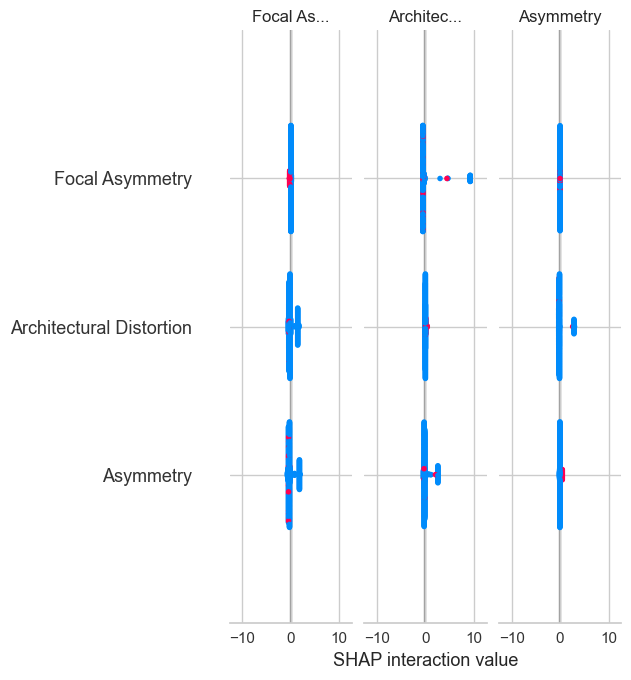

In [16]:
interpret_model(best_model)

In [79]:
pip install shap

Note: you may need to restart the kernel to use updated packages.Collecting shap



In [77]:
df_train

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_birads,...,Global Asymmetry,Mass - Benigna,Mass - Maligna,Mass - Sospechosa,Nipple Retraction,Skin Retraction,Skin Thickening,Suspicious Calcification - Benigna,Suspicious Calcification - Maligna,Suspicious Calcification - Sospechosa
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,...,0,0,0,1,0,0,0,0,0,0
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,...,0,0,0,1,0,0,0,0,0,0
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,BI-RADS 3,...,1,0,0,0,0,0,0,0,0,0
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,BI-RADS 3,...,1,0,0,0,0,0,0,0,0,0
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,BI-RADS 4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,7c98228fc11204260460934ba8c6e12b,5d6e9f5b8bad28ab4cea2f8775649d24,1e6d951c061c1e68ca0056aa7af70405,L,MLO,3580,2663,BI-RADS 4,DENSITY C,BI-RADS 4,...,0,0,0,0,0,0,0,0,0,1
2242,7c98228fc11204260460934ba8c6e12b,5d6e9f5b8bad28ab4cea2f8775649d24,1e6d951c061c1e68ca0056aa7af70405,L,MLO,3580,2663,BI-RADS 4,DENSITY C,BI-RADS 4,...,0,0,0,1,0,0,0,0,0,0
2243,7c98228fc11204260460934ba8c6e12b,5d6e9f5b8bad28ab4cea2f8775649d24,9d88128064cdbc7d426f36da953cebbb,R,CC,3580,2621,BI-RADS 3,DENSITY C,BI-RADS 3,...,0,1,0,0,0,0,0,0,0,0
2252,0bfd4fcebaba4e9c4086edd05044a75f,255af1dcf2e5342bcc6bae1fc1a918cd,997e15346547ff56b4209ac73e74556f,L,MLO,3580,2639,BI-RADS 4,DENSITY C,BI-RADS 4,...,0,0,0,0,0,0,0,0,0,1


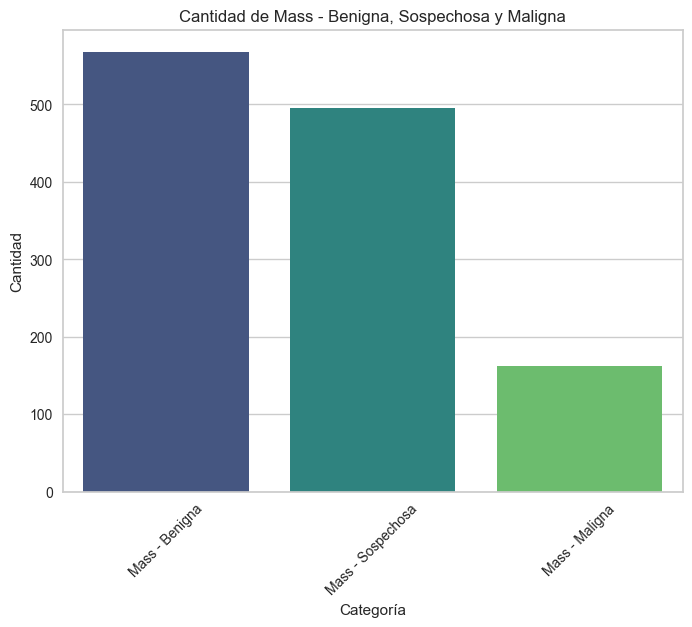

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extraer las listas de 'finding_categories_actualizada' y contarlas
mass_values = df['finding_categories_actualizada'].explode()

# Filtrar solo los valores relacionados con 'Mass'
mass_counts = mass_values[mass_values.str.contains('Mass -')].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=mass_counts.index, y=mass_counts.values, palette='viridis')
plt.title('Cantidad de Mass - Benigna, Sospechosa y Maligna')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()